In [2]:
from PIL import Image
import random
from statistics import mean
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Extraindo dados

In [3]:
dataset_1 = []
dataset_2 = []
dataset_3 = []
classes = []

desc_file = open("./dataset-brazilian_coffee_scenes/desc.txt")
desc = desc_file.read().split("\n")
desc_file.close()

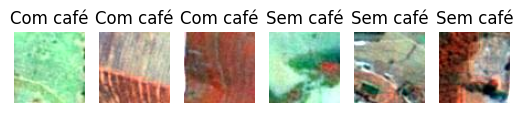

In [4]:
coffee_desc = []
noncoffee_desc = []
for image in desc:
    if "noncoffee." in image:
        noncoffee_desc.append(image)
    else:
        coffee_desc.append(image)

coffee_samples = list(random.sample(coffee_desc, 3))
noncoffee_samples = list(random.sample(noncoffee_desc, 3))
fig, axs = plt.subplots(1, 6)
for ax, sample in zip(axs, coffee_samples + noncoffee_samples):
    if "noncoffee" in sample:
        img_path = "./dataset-brazilian_coffee_scenes/images/" + sample.replace("noncoffee.", "") + ".jpg"
        title = "Sem café"
    else:
        img_path = "./dataset-brazilian_coffee_scenes/images/" + sample.replace("coffee.", "") + ".jpg"
        title = "Com café"

    ax.imshow(mpimg.imread(img_path))
    ax.set_title(title)
    ax.axis('off')

plt.show()

In [5]:
for image in desc:
    if "noncoffee" in image:
        classes.append(0)
        im = Image.open("./dataset-brazilian_coffee_scenes/images/" + image.replace("noncoffee.", "") + ".jpg")
    elif "coffee" in image:
        classes.append(1)
        im = Image.open("./dataset-brazilian_coffee_scenes/images/" + image.replace("coffee.", "") + ".jpg")

    im_data = []
    green = []
    red = []
    nir = []
    ndvi = []
    for pixel_data in list(im.getdata()):
        green.append(pixel_data[0])
        im_data.append(pixel_data[0])
        
        red.append(pixel_data[1])
        im_data.append(pixel_data[1])
        
        nir.append(pixel_data[2])
        im_data.append(pixel_data[2])
        
        try:
            ndvi.append(((pixel_data[2]-pixel_data[1])/(pixel_data[2]+pixel_data[1])) + 1)
            im_data.append(((pixel_data[2]-pixel_data[1])/(pixel_data[2]+pixel_data[1])) + 1)
        except:
            ndvi.append(0)
            im_data.append(0)

    dataset_1.append([x for sets in list(im.getdata()) for x in sets])
    dataset_2.append(im_data)
    dataset_3.append([mean(green), mean(red), mean(nir), mean(ndvi)])

In [6]:
print("Classes")
print(classes.count(0))
print(classes.count(1))
print()

print("Dataset 1")
print(len(dataset_1))
print(len(dataset_1[0]))
print()

print("Dataset 2")
print(len(dataset_2))
print(len(dataset_2[0]))
print()

print("Dataset 3")
print(len(dataset_3))
print(len(dataset_3[0]))

Classes
1438
1438

Dataset 1
2876
12288

Dataset 2
2876
16384

Dataset 3
2876
4


## Comparativos

In [7]:
knn_euc_acc_1 = []
knn_euc_acc_2 = []
knn_euc_acc_3 = []

knn_manh_acc_1 = []
knn_manh_acc_2 = []
knn_manh_acc_3 = []

dwnn_euc_acc_1 = []
dwnn_euc_acc_2 = []
dwnn_euc_acc_3 = []

dwnn_manh_acc_1 = []
dwnn_manh_acc_2 = []
dwnn_manh_acc_3 = []

bayes_acc_1 = []
bayes_acc_2 = []
bayes_acc_3 = []

dt_acc_1 = []
dt_acc_2 = []
dt_acc_3 = []

rf_acc_1 = []
rf_acc_2 = []
rf_acc_3 = []

for i in range(0, 30):
    x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(dataset_1, classes, test_size = 0.3, shuffle = True)
    x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(dataset_2, classes, test_size = 0.3, shuffle = True)
    x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(dataset_3, classes, test_size = 0.3, shuffle = True)

    # knn_manh
    knn = KNeighborsClassifier(metric = 'euclidean').fit(x_train_1, y_train_1)
    y_pred = knn.predict(x_test_1)
    knn_euc_acc_1.append(metrics.accuracy_score(y_test_1, y_pred))

    knn = KNeighborsClassifier(metric = 'euclidean').fit(x_train_2, y_train_2)
    y_pred = knn.predict(x_test_2)
    knn_euc_acc_2.append(metrics.accuracy_score(y_test_2, y_pred))

    knn = KNeighborsClassifier(metric = 'euclidean').fit(x_train_3, y_train_3)
    y_pred = knn.predict(x_test_3)
    knn_euc_acc_3.append(metrics.accuracy_score(y_test_3, y_pred))

    # knn_manh
    knn = KNeighborsClassifier(metric = 'manhattan').fit(x_train_1, y_train_1)
    y_pred = knn.predict(x_test_1)
    knn_manh_acc_1.append(metrics.accuracy_score(y_test_1, y_pred))

    knn = KNeighborsClassifier(metric = 'manhattan').fit(x_train_2, y_train_2)
    y_pred = knn.predict(x_test_2)
    knn_manh_acc_2.append(metrics.accuracy_score(y_test_2, y_pred))

    knn = KNeighborsClassifier(metric = 'manhattan').fit(x_train_3, y_train_3)
    y_pred = knn.predict(x_test_3)
    knn_manh_acc_3.append(metrics.accuracy_score(y_test_3, y_pred))

    # dwnn_euc
    dwnn = KNeighborsClassifier(weights = "distance", metric = 'euclidean').fit(x_train_1, y_train_1)
    y_pred = dwnn.predict(x_test_1)
    dwnn_euc_acc_1.append(metrics.accuracy_score(y_test_1, y_pred))

    dwnn = KNeighborsClassifier(weights = "distance", metric = 'euclidean').fit(x_train_2, y_train_2)
    y_pred = dwnn.predict(x_test_2)
    dwnn_euc_acc_2.append(metrics.accuracy_score(y_test_2, y_pred))

    dwnn = KNeighborsClassifier(weights = "distance", metric = 'euclidean').fit(x_train_3, y_train_3)
    y_pred = dwnn.predict(x_test_3)
    dwnn_euc_acc_3.append(metrics.accuracy_score(y_test_3, y_pred))

    # dwnn_manh
    dwnn = KNeighborsClassifier(weights = "distance", metric = 'manhattan').fit(x_train_1, y_train_1)
    y_pred = dwnn.predict(x_test_1)
    dwnn_manh_acc_1.append(metrics.accuracy_score(y_test_1, y_pred))

    dwnn = KNeighborsClassifier(weights = "distance", metric = 'manhattan').fit(x_train_2, y_train_2)
    y_pred = dwnn.predict(x_test_2)
    dwnn_manh_acc_2.append(metrics.accuracy_score(y_test_2, y_pred))

    dwnn = KNeighborsClassifier(weights = "distance", metric = 'manhattan').fit(x_train_3, y_train_3)
    y_pred = dwnn.predict(x_test_3)
    dwnn_manh_acc_3.append(metrics.accuracy_score(y_test_3, y_pred))

    # naive_bayes
    bayes = GaussianNB().fit(x_train_1, y_train_1)
    y_pred = bayes.predict(x_test_1)
    bayes_acc_1.append(metrics.accuracy_score(y_test_1, y_pred))

    bayes = GaussianNB().fit(x_train_2, y_train_2)
    y_pred = bayes.predict(x_test_2)
    bayes_acc_2.append(metrics.accuracy_score(y_test_2, y_pred))

    bayes = GaussianNB().fit(x_train_3, y_train_3)
    y_pred = bayes.predict(x_test_3)
    bayes_acc_3.append(metrics.accuracy_score(y_test_3, y_pred))
    
    # decision tree
    dt = DecisionTreeClassifier().fit(x_train_1, y_train_1)
    y_pred = dt.predict(x_test_1)
    dt_acc_1.append(metrics.accuracy_score(y_test_1, y_pred))

    dt = DecisionTreeClassifier().fit(x_train_2, y_train_2)
    y_pred = dt.predict(x_test_2)
    dt_acc_2.append(metrics.accuracy_score(y_test_2, y_pred))

    dt = DecisionTreeClassifier().fit(x_train_3, y_train_3)
    y_pred = dt.predict(x_test_3)
    dt_acc_3.append(metrics.accuracy_score(y_test_3, y_pred))

    # random forest
    rf = RandomForestClassifier().fit(x_train_1, y_train_1)
    y_pred = rf.predict(x_test_1)
    rf_acc_1.append(metrics.accuracy_score(y_test_1, y_pred))

    rf = RandomForestClassifier().fit(x_train_2, y_train_2)
    y_pred = rf.predict(x_test_2)
    rf_acc_2.append(metrics.accuracy_score(y_test_2, y_pred))

    rf = RandomForestClassifier().fit(x_train_3, y_train_3)
    y_pred = rf.predict(x_test_3)
    rf_acc_3.append(metrics.accuracy_score(y_test_3, y_pred))

## Gráficos

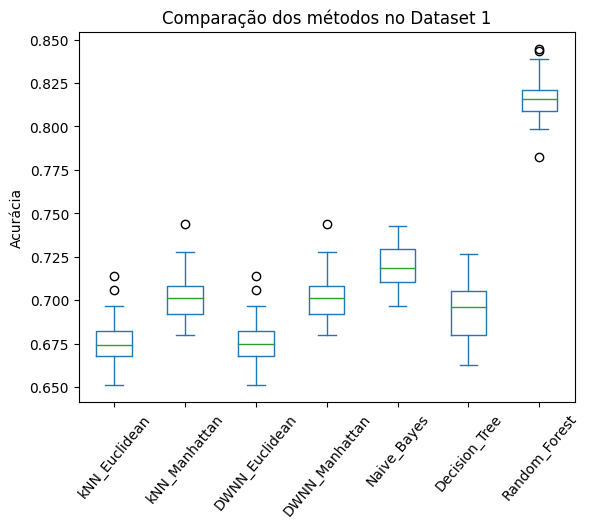

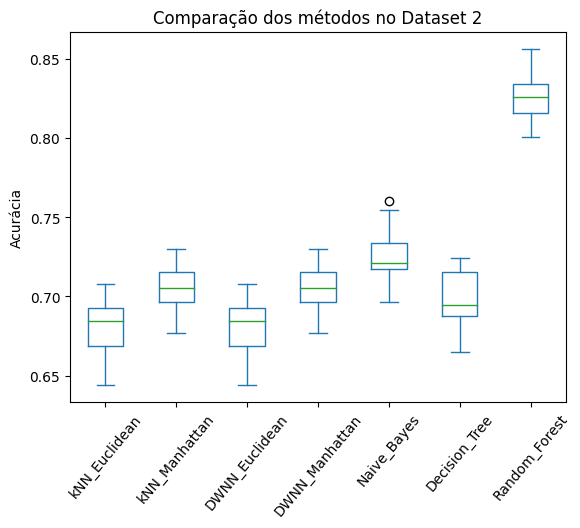

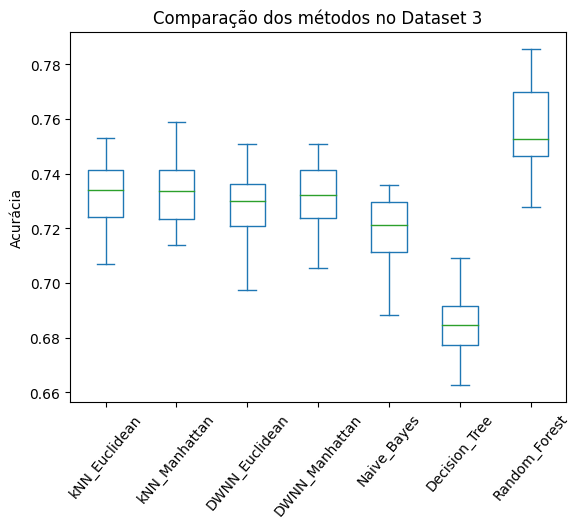

In [8]:
labels = ["kNN_Euclidean", "kNN_Manhattan", "DWNN_Euclidean", "DWNN_Manhattan", "Naive_Bayes", "Decision_Tree", "Random_Forest"]

acc_1 = {
    "kNN_Euclidean": knn_euc_acc_1,
    "kNN_Manhattan": knn_manh_acc_1,
    "DWNN_Euclidean": dwnn_euc_acc_1,
    "DWNN_Manhattan": dwnn_manh_acc_1,
    "Naive_Bayes": bayes_acc_1,
    "Decision_Tree": dt_acc_1,
    "Random_Forest": rf_acc_1
}
df_1 = pd.DataFrame(acc_1)
df_1.to_csv(path_or_buf="./dataset_1_results.csv")

acc_2 = {
    "kNN_Euclidean": knn_euc_acc_2,
    "kNN_Manhattan": knn_manh_acc_2,
    "DWNN_Euclidean": dwnn_euc_acc_2,
    "DWNN_Manhattan": dwnn_manh_acc_2,
    "Naive_Bayes": bayes_acc_2,
    "Decision_Tree": dt_acc_2,
    "Random_Forest": rf_acc_2
}
df_2 = pd.DataFrame(acc_2)
df_2.to_csv(path_or_buf="./dataset_2_results.csv")

acc_3 = {
    "kNN_Euclidean": knn_euc_acc_3,
    "kNN_Manhattan": knn_manh_acc_3,
    "DWNN_Euclidean": dwnn_euc_acc_3,
    "DWNN_Manhattan": dwnn_manh_acc_3,
    "Naive_Bayes": bayes_acc_3,
    "Decision_Tree": dt_acc_3,
    "Random_Forest": rf_acc_3
}
df_3 = pd.DataFrame(acc_3)
df_3.to_csv(path_or_buf="./dataset_3_results.csv")

df_1[labels].plot(kind='box', title='boxplot')
plt.title("Comparação dos métodos no Dataset 1")
plt.ylabel('Acurácia')
plt.xticks(rotation=50)
plt.show()

df_2[labels].plot(kind='box', title='boxplot')
plt.title("Comparação dos métodos no Dataset 2")
plt.ylabel('Acurácia')
plt.xticks(rotation=50)
plt.show()

df_3[labels].plot(kind='box', title='boxplot')
plt.title("Comparação dos métodos no Dataset 3")
plt.ylabel('Acurácia')
plt.xticks(rotation=50)
plt.show()